In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pandas에서 seaborn으로 그래프 그리기
seaborn라이브러리를 임포트할 수도 있지만 pandas객체만으로도 plot메서드를 사용해 그래프를 그릴 수 있다

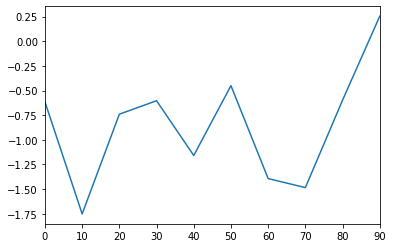

In [8]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

# matplotlib.pyplot이 임포트된 상태에서만 위 명령으로 시각화된다.

--> Series객체의 색인은 x축으로 해석(use_index=False옵션을 넘겨서 색인을 그래프의 축으로 사용하는 것을 막을 수 있다.)

matplotlib처럼 xticks와 xlim 옵션으로 조절할 수 있음(y 역시 마찬가지)

대부분의 pandas 그래프 메서드는 부수적으로 ax인자를 받는데 이 인자는 matplotlib의 서브플롯 객체가 될 수 있다.

이를 이용해 그리드 배열사에서 서브플롯의 위치를 좀 더 유연하게 가져갈 수 있다.
## DataFrame에서

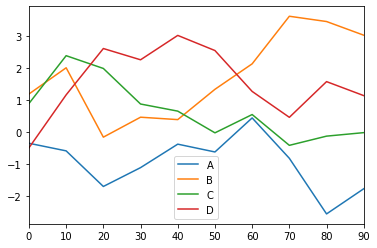

In [6]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(axis=0),columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

# DataFrame의 plot 메서드는 하나의 서브플롯 안에 각 '컬럼' 별로 선그래프를 그리고 자동적으로 범례를 생성
# Series와 마찬가지로 index가 x축의 눈금

### Series.plot 메서드 인자
- label : 그래프의 범례이름 
- ax : 그래프를 그릴 matplotlib의 서브플롯 객체, 아무 값도 입력하지 않으면 현재 활성화된 matplotlib의 서브플롯을 이용
- logy : y축에 대한 로그 스케일링
- use_index : 객체의 색인을 눈금이름으로 사용할지 여부
- rot : 눈금이름을 로테이션(0~360)
- grid : 축의 그리드를 표시할지 여부(기본값은 False)
- style, alpha, xticks, yticks, xlim, ylim
- kind : 그래프의 종류(bar,area,barh,density,hist,line,pie,kde 등)  plot.bar(~)이런 식으로 사용가능

### DataFrame.plot 메서드 인자
- subplots : 각 DataFrame의 컬럼을 독립된 서브플롯에 그린다.
- sort_columns : 컬럼을 알파벳 순서로 그린다. 기본값은 존재하는 컬럼 순서
- sharex, sharey, figsize, title, legend

## 막대그래프(bar, barh)

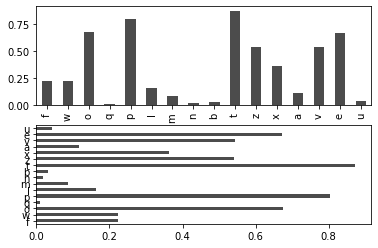

In [19]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('fwoqplmnbtzxaveu'))

# data.plot.bar(세로) or barh(가로)

data.plot.bar(ax=axes[0],color='k',alpha=0.7)  # 세로방향 막대그래프
data.plot.barh(ax=axes[1],color='k',alpha=0.7)  # 가로방향 막대그래프

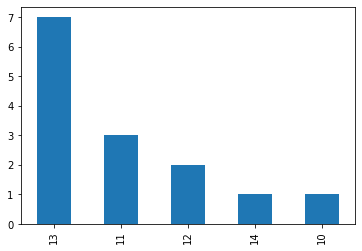

In [30]:
# 막대그래프를 그릴 때 유용한 방법은 Series의 value_counts메서드를 이용하는 것
# s.value_counts().plot.bar()

data2 = list(np.random.randint(10,15,size=(14)))
data3 = pd.Series(data2)
data3.value_counts().plot.bar()

### DataFrame에서는 컬럼별로 범례 생성

In [8]:
df = pd.DataFrame(np.random.rand(6,4),index = ['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,0.624501,0.959678,0.028538,0.121323
two,0.591637,0.468164,0.799150,0.328133
three,0.705771,0.157676,0.498056,0.489395
four,0.015747,0.535589,0.332935,0.905034
five,0.497542,0.147759,0.614898,0.167833
six,0.720384,0.865947,0.566623,0.504828


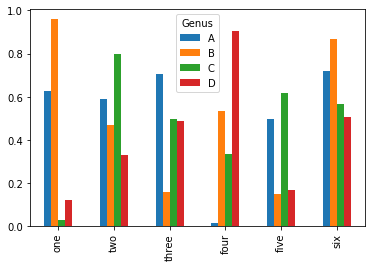

In [9]:
# 컬럼인 'Genus'가 범례의 제목으로 사용되었음

df.plot.bar()

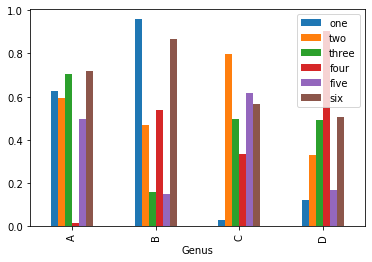

In [10]:
df.stack().unstack(level=0).plot.bar()

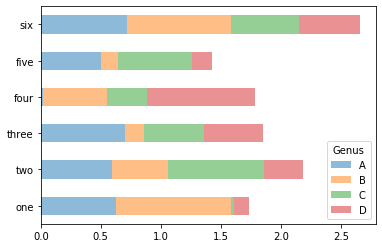

In [11]:
# stacked=True 옵션은 각 로우의 값들이 하나의 막대에 누적되어 출력됨 

df.plot.barh(stacked=True, alpha=0.5)

In [43]:
tips = pd.read_csv('tips.csv')

# crosstab(col1,col2)는 col1을 기준으로 col2의 빈도를 구한다
party_counts = pd.crosstab(tips['day'],tips['size'])

#1인과 6인 파티는 제외
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [44]:
# 각 로우의 합이 1이 되도록 정규화하고 그래프 그리기
party_pcts = party_counts.div(party_counts.sum(1),axis=0)

# party_counts.sum(1)은 각 요일마다의 합으로 구성된 Series

party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


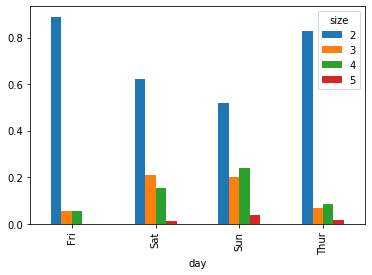

In [45]:
party_pcts.plot.bar()

# seaborn 패키지 이용

In [46]:
# 요약을 해야하는 데이터는 seaborn 패키지 이용하면 훨씬 간단하게 처리할 수 있다.
import seaborn as sns

In [47]:
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


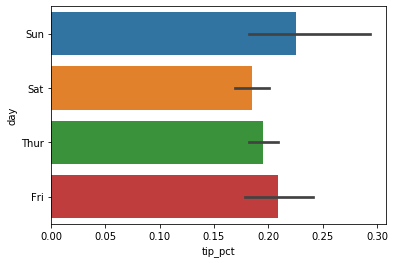

In [48]:
# seaborn 플로팅 함수의 data 인자는 pandas의 DataFrame을 받는다

sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

# 덧그려진 검은 선은 95%의 신뢰구간

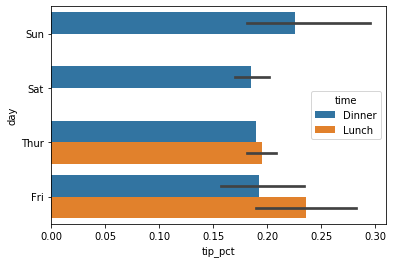

In [49]:
# hue 옵션을 이용하면 추가분류에 따라 나눠 그릴 수 있다

sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

set 메서드를 이용해 자동으로 정해진 꾸밈새를 변경할 수 있다.

sns.set(style='whitegrid')

## 히스토그램과 밀도 그래프
밀도그래프는 연속된 확률 분포를 그린다.

밀도그래프는 KDE 그래프라고도 알려져 있다.

plot.kde

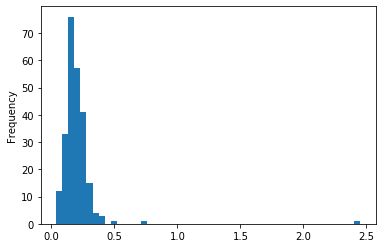

In [51]:
tips['tip_pct'].plot.hist(bins=50)

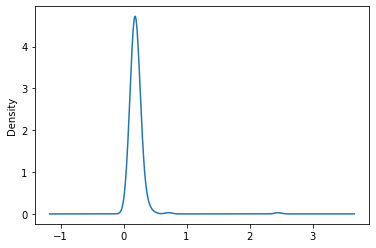

In [52]:
tips['tip_pct'].plot.density()

### distplot 메서드
distplot 메서드를 이용하면 히스토그램과 밀도 그래프를 한번에 손 쉽게 그릴 수 있다.

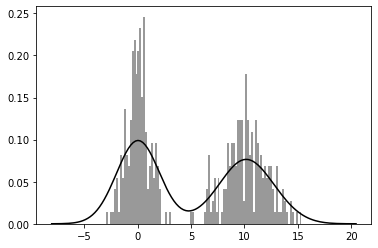

In [25]:
# 두 개의 표준정규분포로 이루어진 양봉분포

comp1 = np.random.normal(0,1,size = 200)
comp2 = np.random.normal(10,2,size = 200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

## 산포도(regplot 메서드 이용)
두 개의 1차원 데이터 묶음 간의 관계를 나타내고자 할 때 유용한 그래프

In [54]:
# statsmodels 프로젝트에서 macrodata 데이터 묶음을 불러온 다음 몇 가지 변수를 선택하고 로그해보기

macro = pd.read_csv('macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

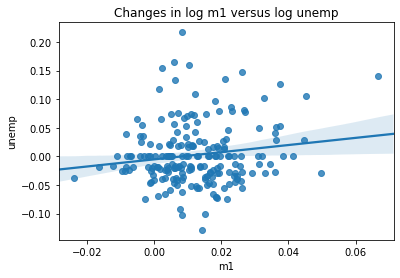

In [55]:
# 메서드를 이용해 산포도와 선형회귀곡선을 함께 그릴 수 있음

sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1','unemp'))

### pairplot 메서드
변수 그룹 간의 모든 산포도를 살펴보기 --> 짝지은 그래프 또는 산포도 행렬. 

대각선을 따라 각 변수에 대한 히스토그램이나 밀도그래프도 생성할 수 있다.

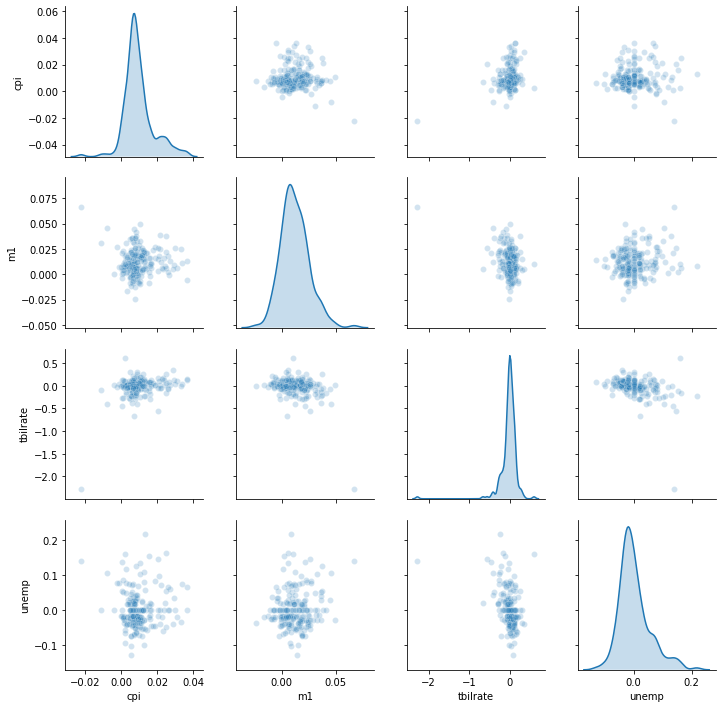

In [59]:
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.2})
# plot_kws 인자는 각각의 그래프에 전달할 개별 설정값을 지정

# 대각성분과 그 외 성분들이 모양이 다른 것 주목

# 패싯 그리드와 범주형

다양한 범주형 값을 가지는 데이터를 시각화하는 방법은 패싯 그리드를 이용하는 것. factorplot 함수를 이용

- row,col을 이용해 기준삼는다.

C:\Users\Choi.YJ\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


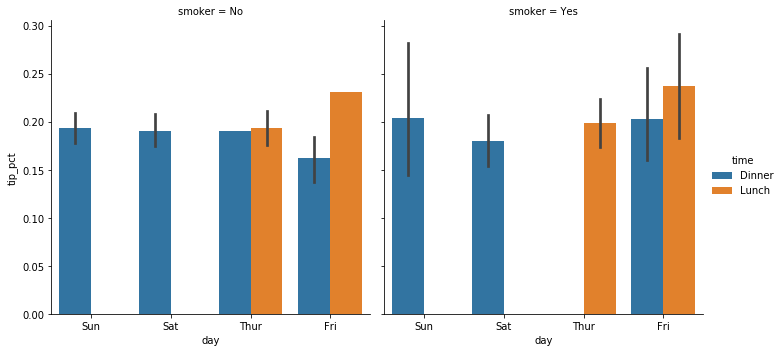

In [33]:
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

# x,y는 라벨명을 지정, 스모킹 여부를 가지고 두개로 나누어 비교했으며 시간에 따른 그래프의 색상을 달리할 수 있음.
# tip_pct가 1보다 작은 불리언 배열을 기준으로 줘서 사용할 data의 양을 줄임

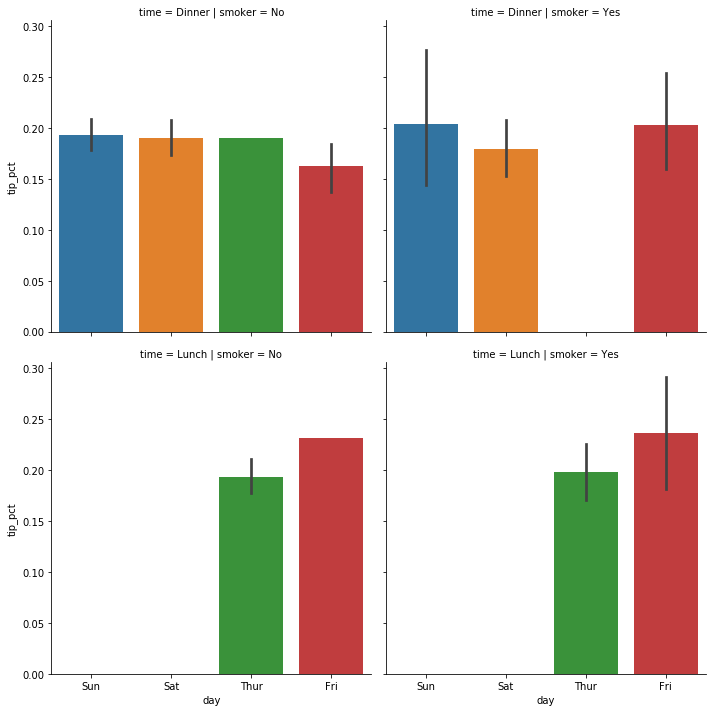

In [34]:
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

# hue 대신 로우에 time을 지정해 여러 그래프로 나타낼 수도 있다.

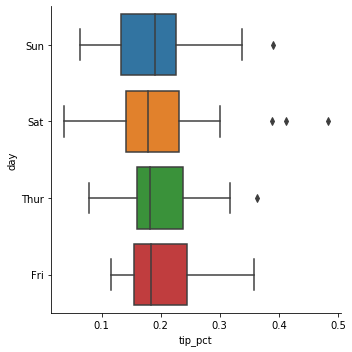

In [35]:
# kind를 box형태로 함으로서 중간값과 사분위, 특이값을 보여주는 box plot으로 나타낼 수도 있음

sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct<0.5])